<a href="https://colab.research.google.com/github/shoiTK/deep_learning_with_pytorch/blob/main/MyHRnetSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Info

Group	Classes (30)

**flat**:	road · sidewalk · parking · rail track

**human**:	person · rider

**vehicle**:	car · truck · bus · on rails · motorcycle · bicycle · caravan · trailer

**construction**:	building · wall · fence · guard rail · bridge · tunnel

**object**:	pole · pole group+ · traffic sign · traffic light

**nature**:	vegetation · terrain

**sky**:	sky

**void**:	ground · dynamic · static

In [75]:
import os
dataset_root_gtFine = "./HRNet-Semantic-Segmentation/data/cityscapes/gtFine"
dataset_root_leftImg8bit = "./HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit"
num_file = {'train':0, 'test':0, 'val':0}

dataset_root = dataset_root_leftImg8bit

sum_file = 0
for ttv in os.listdir(dataset_root):
  for name in os.listdir(os.path.join(dataset_root, ttv)):
    for file in os.listdir(os.path.join(dataset_root, ttv, name)):
      num_file[ttv] += 1

sum_file = num_file['train'] + num_file['test'] + num_file['val']
print(num_file, "sum:", sum_file)

{'train': 2975, 'test': 1525, 'val': 500} sum: 5000


In [67]:
list_dir = "/content/HRNet-Semantic-Segmentation/data/list/cityscapes"

num_list = {}
sum_file = 0
for file in os.listdir(list_dir):
  num_list[file] = 0
  with open(os.path.join(list_dir, file), "r") as file_data:
    lines = file_data.readlines()
    num_list[file] += len(lines)

sum_file = num_list['train.lst'] + num_list['trainval.lst'] + num_list['test.lst'] + num_list['val.lst']
print(num_list, "sum:", sum_file)

{'val.lst': 500, 'test.lst': 1525, 'trainval.lst': 3475, 'train.lst': 2975} sum: 8475


./HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit/train/erfurt/erfurt_000034_000019_leftImg8bit.png
./HRNet-Semantic-Segmentation/data/cityscapes/gtFine/train/erfurt/erfurt_000034_000019_gtFine_color.png
./HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit/val/lindau/lindau_000024_000019_leftImg8bit.png
./HRNet-Semantic-Segmentation/data/cityscapes/gtFine/val/lindau/lindau_000024_000019_gtFine_color.png
./HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit/test/leverkusen/leverkusen_000047_000019_leftImg8bit.png
./HRNet-Semantic-Segmentation/data/cityscapes/gtFine/test/leverkusen/leverkusen_000047_000019_gtFine_color.png


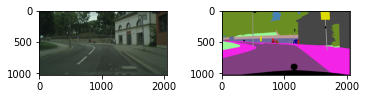

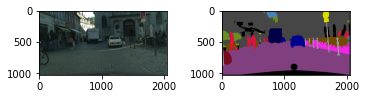

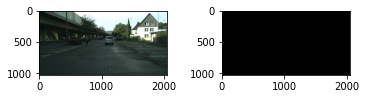

In [119]:
import os
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

def get_left_file(str_name):
  b_gt = "./HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit/"
  a_gt = "_leftImg8bit"
  str1 = str_name.split(b_gt)
  str2 = str1[1].split(a_gt)
  b_left = "./HRNet-Semantic-Segmentation/data/cityscapes/gtFine/"
  a_left = "_gtFine_color.png"
  str_left = b_left + str2[0] + a_left
  print(str_left)
  return str_left

#left_img_dir = "/content/HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png"
dataset_root_gtFine = "./HRNet-Semantic-Segmentation/data/cityscapes/gtFine"
dataset_root_leftImg8bit = "./HRNet-Semantic-Segmentation/data/cityscapes/leftImg8bit"
dataset_root = [dataset_root_gtFine, dataset_root_leftImg8bit]
gt_list= []
left_list = []
root = dataset_root_leftImg8bit
for ttv in os.listdir(root):
  i = 0
  for name in os.listdir(os.path.join(root, ttv)):
    for file in os.listdir(os.path.join(root, ttv, name)):
      if i == 10 and 'png' in file:
        file_name = os.path.join(root, ttv, name, file)
        gt_list.append(file_name)
        print(file_name)
        left_list.append(get_left_file(file_name))
        i += 1
        break
      elif i < 10:
        i += 1
      else:
        break

len_file = len(gt_list)
for i in range(len_file):
  img = np.array(Image.open(gt_list[i]))
  seg = np.array(Image.open(left_list[i]))

  #print(img.shape, seg.shape)
  plt.subplot(len_file, 2, i*2+1)
  plt.imshow(img)
  plt.subplot(len_file, 2, i*2+2)
  plt.imshow(seg)
  plt.show()

In [82]:
!pwd

/content


#install dataset

In [9]:
!git clone https://github.com/HRNet/HRNet-Semantic-Segmentation 

Cloning into 'HRNet-Semantic-Segmentation'...
remote: Enumerating objects: 1206, done.
remote: Total 1206 (delta 0), reused 0 (delta 0), pack-reused 1206
Receiving objects: 100% (1206/1206), 1.24 MiB | 7.29 MiB/s, done.
Resolving deltas: 100% (751/751), done.


In [ ]:
!pip install -r /content/HRNet-Semantic-Segmentation/requirements.txt
!pip install imgaug==0.2.5

In [ ]:
!mkdir /content/HRNet-Semantic-Segmentation/data/cityscapes
!unzip /content/drive/MyDrive/cityscapes/gtFine_trainvaltest.zip  -d /content/HRNet-Semantic-Segmentation/data/cityscapes

In [27]:
!rm /content/HRNet-Semantic-Segmentation/data/cityscapes/README
!rm /content/HRNet-Semantic-Segmentation/data/cityscapes/license.txt

In [ ]:
!unzip /content/drive/MyDrive/cityscapes/leftImg8bit_trainvaltest.zip -d /content/HRNet-Semantic-Segmentation/data/cityscapes

In [29]:
%cd HRNet-Semantic-Segmentation/

/content/HRNet-Semantic-Segmentation


# Import

In [1]:
import os
import logging
import functools
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import argparse
import pprint
import shutil
import sys
import logging
import time
import timeit
from pathlib import Path
from tensorboardX import SummaryWriter
import numpy.ma as ma
from tqdm import tqdm

import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch._utils
import torch.nn.functional as F
from torch.utils import data
from torch.utils.data import TensorDataset, DataLoader
import torch.optim

#Second Import

In [2]:
%cd HRNet-Semantic-Segmentation/

/content/HRNet-Semantic-Segmentation


In [3]:
import tools._init_paths

%cd lib
from utils.utils import AverageMeter
from utils.utils import get_confusion_matrix
from utils.utils import adjust_learning_rate
from utils.utils import create_logger

from config import update_config
from core.criterion import CrossEntropy, OhemCrossEntropy
%cd ..

/content/HRNet-Semantic-Segmentation/lib
/content/HRNet-Semantic-Segmentation


# Create Model

In [16]:
BatchNorm2d = nn.BatchNorm2d
BN_MOMENTUM = 0.01
logger = logging.getLogger(__name__)


class FullModel(nn.Module):
  def __init__(self, model, loss):
    super(FullModel, self).__init__()
    self.model = model
    self.loss = loss

  def forward(self, inputs, labels):
    outputs = self.model(inputs)
    loss = self.loss(outputs, labels)
    return torch.unsqueeze(loss,0), outputs

def conv3x3(in_planes, out_planes, stride=1):
  return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
  expansion = 1
  def __init__(self, inplanes, planes, stride=1, downsample=None):
    super(BasicBlock, self).__init__()
    self.conv1 = conv3x3(inplanes, planes, stride)
    self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
    self.relu = nn.ReLU(inplace=False)
    self.conv2 = conv3x3(planes, planes)
    self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
    self.downsample = downsample
    self.stride = stride
  
  def forward(self, x):
    residual = x

    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)

    out = self.conv2(out)
    out = self.bn2(out)

    if self.downsample is not None:
        residual = self.downsample(x)

    out = out + residual
    out = self.relu(out)

    return out


In [17]:
class Bottleneck(nn.Module):
  expansion = 4

  def __init__(self, inplanes, planes, stride=1, downsample=None):
    super(Bottleneck, self).__init__()
    self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
    self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
    self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
    self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
    self.bn3 = BatchNorm2d(planes * self.expansion, momentum=BN_MOMENTUM)
    self.relu = nn.ReLU(inplace=False)
    self.downsample = downsample
    self.stride = stride
  
  def forward(self, x):
    residual = x

    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)

    out = self.conv2(out)
    out = self.bn2(out)
    out = self.relu(out)

    out = self.conv3(out)
    out = self.bn3(out)

    if self.downsample is not None:
        residual = self.downsample(x)

    out = out + residual
    out = self.relu(out)

    return out


In [18]:
class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks, num_blocks, num_inchannels,
                 num_channels, fuse_method, multi_scale_output=True):
      super(HighResolutionModule, self).__init__()
      self._check_branches(num_branches, blocks, num_blocks, num_inchannels, num_channels)

      self.num_inchannels = num_inchannels
      self.fuse_method = fuse_method
      self.num_branches = num_branches

      self.multi_scale_output = multi_scale_output

      self.branches = self._make_branches(num_branches, blocks, num_blocks, num_channels)
      self.fuse_layers = self._make_fuse_layers()
      self.relu = nn.ReLU(inplace=False)

    def _check_branches(self, num_branches, blocks, num_blocks, num_inchannels, num_channels):
      if num_branches != len(num_blocks):
          error_msg = 'NUM_BRANCHES({}) <> NUM_BLOCKS({})'.format(num_branches, len(num_blocks))
          logger.error(error_msg)
          raise ValueError(error_msg)

      if num_branches != len(num_channels):
          error_msg = 'NUM_BRANCHES({}) <> NUM_CHANNELS({})'.format(num_branches, len(num_channels))
          logger.error(error_msg)
          raise ValueError(error_msg)

      if num_branches != len(num_inchannels):
          error_msg = 'NUM_BRANCHES({}) <> NUM_INCHANNELS({})'.format(num_branches, len(num_inchannels))
          logger.error(error_msg)
          raise ValueError(error_msg)

    def _make_one_branch(self, branch_index, block, num_blocks, num_channels, stride=1):
      downsample = None
      if stride != 1 or \
          self.num_inchannels[branch_index] != num_channels[branch_index] * block.expansion:
          downsample = nn.Sequential(
              nn.Conv2d(self.num_inchannels[branch_index],
                        num_channels[branch_index] * block.expansion,
                        kernel_size=1, stride=stride, bias=False),
              BatchNorm2d(num_channels[branch_index] * block.expansion,
                          momentum=BN_MOMENTUM),
          )

      layers = []
      layers.append(block(self.num_inchannels[branch_index],
                          num_channels[branch_index], stride, downsample))
      self.num_inchannels[branch_index] = \
          num_channels[branch_index] * block.expansion
      for i in range(1, num_blocks[branch_index]):
          layers.append(block(self.num_inchannels[branch_index],
                              num_channels[branch_index]))

      return nn.Sequential(*layers)

    def _make_branches(self, num_branches, block, num_blocks, num_channels):
      branches = []

      for i in range(num_branches):
          branches.append(
              self._make_one_branch(i, block, num_blocks, num_channels))

      return nn.ModuleList(branches)

    def _make_fuse_layers(self):
      if self.num_branches == 1:
          return None

      num_branches = self.num_branches
      num_inchannels = self.num_inchannels
      fuse_layers = []
      for i in range(num_branches if self.multi_scale_output else 1):
          fuse_layer = []
          for j in range(num_branches):
              if j > i:
                  fuse_layer.append(nn.Sequential(
                      nn.Conv2d(num_inchannels[j],
                                num_inchannels[i],
                                1,
                                1,
                                0,
                                bias=False),
                      BatchNorm2d(num_inchannels[i], momentum=BN_MOMENTUM)))
              elif j == i:
                  fuse_layer.append(None)
              else:
                  conv3x3s = []
                  for k in range(i-j):
                      if k == i - j - 1:
                          num_outchannels_conv3x3 = num_inchannels[i]
                          conv3x3s.append(nn.Sequential(
                              nn.Conv2d(num_inchannels[j],
                                        num_outchannels_conv3x3,
                                        3, 2, 1, bias=False),
                              BatchNorm2d(num_outchannels_conv3x3, 
                                          momentum=BN_MOMENTUM)))
                      else:
                          num_outchannels_conv3x3 = num_inchannels[j]
                          conv3x3s.append(nn.Sequential(
                              nn.Conv2d(num_inchannels[j],
                                        num_outchannels_conv3x3,
                                        3, 2, 1, bias=False),
                              BatchNorm2d(num_outchannels_conv3x3,
                                          momentum=BN_MOMENTUM),
                              nn.ReLU(inplace=False)))
                  fuse_layer.append(nn.Sequential(*conv3x3s))
          fuse_layers.append(nn.ModuleList(fuse_layer))

      return nn.ModuleList(fuse_layers)

    def get_num_inchannels(self):
      return self.num_inchannels

    def forward(self, x):
      if self.num_branches == 1:
          return [self.branches[0](x[0])]

      for i in range(self.num_branches):
          x[i] = self.branches[i](x[i])

      x_fuse = []
      for i in range(len(self.fuse_layers)):
          y = x[0] if i == 0 else self.fuse_layers[i][0](x[0])
          for j in range(1, self.num_branches):
              if i == j:
                  y = y + x[j]
              elif j > i:
                  width_output = x[i].shape[-1]
                  height_output = x[i].shape[-2]
                  y = y + F.interpolate(
                      self.fuse_layers[i][j](x[j]),
                      size=[height_output, width_output],
                      mode='bilinear')
              else:
                  y = y + self.fuse_layers[i][j](x[j])
          x_fuse.append(self.relu(y))

      return x_fuse

In [19]:
blocks_dict = {
    'BASIC': BasicBlock,
    'BOTTLENECK': Bottleneck
}

class HighResolutionNet(nn.Module):

    def __init__(self, config, **kwargs):
        extra = config['MODEL']['EXTRA']
        super(HighResolutionNet, self).__init__()

        # stem net
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1,
                               bias=False)
        self.bn1 = BatchNorm2d(64, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1,
                               bias=False)
        self.bn2 = BatchNorm2d(64, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=False)

        self.stage1_cfg = extra['STAGE1']
        num_channels = self.stage1_cfg['NUM_CHANNELS'][0]
        block = blocks_dict[self.stage1_cfg['BLOCK']]
        num_blocks = self.stage1_cfg['NUM_BLOCKS'][0]
        self.layer1 = self._make_layer(block, 64, num_channels, num_blocks)
        stage1_out_channel = block.expansion*num_channels

        self.stage2_cfg = extra['STAGE2']
        num_channels = self.stage2_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage2_cfg['BLOCK']]
        num_channels = [
            num_channels[i] * block.expansion for i in range(len(num_channels))]
        self.transition1 = self._make_transition_layer(
            [stage1_out_channel], num_channels)
        self.stage2, pre_stage_channels = self._make_stage(
            self.stage2_cfg, num_channels)

        self.stage3_cfg = extra['STAGE3']
        num_channels = self.stage3_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage3_cfg['BLOCK']]
        num_channels = [
            num_channels[i] * block.expansion for i in range(len(num_channels))]
        self.transition2 = self._make_transition_layer(
            pre_stage_channels, num_channels)
        self.stage3, pre_stage_channels = self._make_stage(
            self.stage3_cfg, num_channels)

        self.stage4_cfg = extra['STAGE4']
        num_channels = self.stage4_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage4_cfg['BLOCK']]
        num_channels = [
            num_channels[i] * block.expansion for i in range(len(num_channels))]
        self.transition3 = self._make_transition_layer(
            pre_stage_channels, num_channels)
        self.stage4, pre_stage_channels = self._make_stage(
            self.stage4_cfg, num_channels, multi_scale_output=True)
        
        last_inp_channels = np.int(np.sum(pre_stage_channels))

        self.last_layer = nn.Sequential(
            nn.Conv2d(
                in_channels=last_inp_channels,
                out_channels=last_inp_channels,
                kernel_size=1,
                stride=1,
                padding=0),
            BatchNorm2d(last_inp_channels, momentum=BN_MOMENTUM),
            nn.ReLU(inplace=False),
            nn.Conv2d(
                in_channels=last_inp_channels,
                out_channels=config['DATASET']['NUM_CLASSES'],
                kernel_size=extra['FINAL_CONV_KERNEL'],
                stride=1,
                padding=1 if extra['FINAL_CONV_KERNEL'] == 3 else 0)
        )

    def _make_transition_layer(
            self, num_channels_pre_layer, num_channels_cur_layer):
        num_branches_cur = len(num_channels_cur_layer)
        num_branches_pre = len(num_channels_pre_layer)

        transition_layers = []
        for i in range(num_branches_cur):
            if i < num_branches_pre:
                if num_channels_cur_layer[i] != num_channels_pre_layer[i]:
                    transition_layers.append(nn.Sequential(
                        nn.Conv2d(num_channels_pre_layer[i],
                                  num_channels_cur_layer[i],
                                  3,
                                  1,
                                  1,
                                  bias=False),
                        BatchNorm2d(
                            num_channels_cur_layer[i], momentum=BN_MOMENTUM),
                        nn.ReLU(inplace=False)))
                else:
                    transition_layers.append(None)
            else:
                conv3x3s = []
                for j in range(i+1-num_branches_pre):
                    inchannels = num_channels_pre_layer[-1]
                    outchannels = num_channels_cur_layer[i] \
                        if j == i-num_branches_pre else inchannels
                    conv3x3s.append(nn.Sequential(
                        nn.Conv2d(
                            inchannels, outchannels, 3, 2, 1, bias=False),
                        BatchNorm2d(outchannels, momentum=BN_MOMENTUM),
                        nn.ReLU(inplace=False)))
                transition_layers.append(nn.Sequential(*conv3x3s))

        return nn.ModuleList(transition_layers)

    def _make_layer(self, block, inplanes, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                BatchNorm2d(planes * block.expansion, momentum=BN_MOMENTUM),
            )

        layers = []
        layers.append(block(inplanes, planes, stride, downsample))
        inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(inplanes, planes))

        return nn.Sequential(*layers)

    def _make_stage(self, layer_config, num_inchannels,
                    multi_scale_output=True):
        num_modules = layer_config['NUM_MODULES']
        num_branches = layer_config['NUM_BRANCHES']
        num_blocks = layer_config['NUM_BLOCKS']
        num_channels = layer_config['NUM_CHANNELS']
        block = blocks_dict[layer_config['BLOCK']]
        fuse_method = layer_config['FUSE_METHOD']

        modules = []
        for i in range(num_modules):
            # multi_scale_output is only used last module
            if not multi_scale_output and i == num_modules - 1:
                reset_multi_scale_output = False
            else:
                reset_multi_scale_output = True
            modules.append(
                HighResolutionModule(num_branches,
                                      block,
                                      num_blocks,
                                      num_inchannels,
                                      num_channels,
                                      fuse_method,
                                      reset_multi_scale_output)
            )
            num_inchannels = modules[-1].get_num_inchannels()

        return nn.Sequential(*modules), num_inchannels

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.layer1(x)
        x_list = [] #各ステージのアウトプットのリスト
        for i in range(self.stage2_cfg['NUM_BRANCHES']):
            if self.transition1[i] is not None:
                x_list.append(self.transition1[i](x))
            else:
                x_list.append(x)
        y_list = self.stage2(x_list)

        x_list = []
        for i in range(self.stage3_cfg['NUM_BRANCHES']):
            if self.transition2[i] is not None:
                if i < self.stage2_cfg['NUM_BRANCHES']:
                    x_list.append(self.transition2[i](y_list[i]))
                else:
                    x_list.append(self.transition2[i](y_list[-1]))
            else:
                x_list.append(y_list[i])
        y_list = self.stage3(x_list)

        x_list = []
        for i in range(self.stage4_cfg['NUM_BRANCHES']):
            if self.transition3[i] is not None:
                if i < self.stage3_cfg['NUM_BRANCHES']:
                    x_list.append(self.transition3[i](y_list[i]))
                else:
                    x_list.append(self.transition3[i](y_list[-1]))
            else:
                x_list.append(y_list[i])
        x = self.stage4(x_list)
        #print(x.shape)
        # Upsampling
        x0_h, x0_w = x[0].size(2), x[0].size(3)
        #x0_h, x0_w = x0_h* 4, x0_w * 2 
        #print(x0_h, x0_w)
        x1 = F.upsample(x[1], size=(x0_h, x0_w), mode='bilinear')
        x2 = F.upsample(x[2], size=(x0_h, x0_w), mode='bilinear')
        x3 = F.upsample(x[3], size=(x0_h, x0_w), mode='bilinear')

        x = torch.cat([x[0], x1, x2, x3], 1)

        x = self.last_layer(x)

        return x

    def init_weights(self, pretrained='',):
        logger.info('=> init weights from normal distribution')
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, std=0.001)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
        if pretrained:
            pretrained_dict = torch.load(pretrained)
            logger.info('=> loading pretrained model {}'.format(pretrained))
            model_dict = self.state_dict()
            pretrained_dict = {k: v for k, v in pretrained_dict.items()
                               if k in model_dict.keys()}
            for k, _ in pretrained_dict.items():
                logger.info(
                    '=> loading {} pretrained model {}'.format(k, pretrained))
            model_dict.update(pretrained_dict)
            self.load_state_dict(model_dict)

def get_seg_model(cfg, **kwargs):
    model = HighResolutionNet(cfg, **kwargs)
    model.init_weights(cfg['MODEL']['PRETRAINED'])

    return model

In [20]:
net = HighResolutionNet(config)
print(net)

HighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (conv3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (relu): ReLU()
      (dow

#Create config

In [49]:
config = {}

config['OUTPUT'] = {
    'DIR': './output'
}
config['WORKERS'] = 4

config['DATASET'] = {
  'DATASET': 'cityscapes',
  'ROOT': 'data/',
  'TEST_SET': 'list/cityscapes/val.lst',
  'TRAIN_SET': 'list/cityscapes/train.lst',
  'NUM_CLASSES': 19,
}

#config['PRETRAINED'] = None 'PRETRAINED': None,

config['MODEL'] = {
    'PRETRAINED': None,
    'EXTRA':
      {'FINAL_CONV_KERNEL': 1,
      'STAGE1': {'BLOCK': 'BOTTLENECK', 
                  'FUSE_METHOD': 'SUM',
                  'NUM_BLOCKS': [1],
                  'NUM_CHANNELS': [32],
                  'NUM_MODULES': 1,
                  'NUM_RANCHES': 1
                },
      'STAGE2': {'BLOCK': 'BASIC',
                  'FUSE_METHOD': 'SUM',
                  'NUM_BLOCKS': [2, 2],
                  'NUM_BRANCHES': 2,
                  'NUM_CHANNELS': [16, 32],
                  'NUM_MODULES': 1
                },
      'STAGE3':{'BLOCK': 'BASIC',
                'FUSE_METHOD': 'SUM',
                'NUM_BLOCKS': [2, 2, 2],
                'NUM_BRANCHES': 3,
                'NUM_CHANNELS': [16, 32, 64],
                'NUM_MODULES': 1
                },
      'STAGE4': {'BLOCK': 'BASIC',
                'FUSE_METHOD': 'SUM',
                'NUM_BLOCKS': [2, 2, 2, 2],
                'NUM_BRANCHES': 4,
                'NUM_CHANNELS': [16, 32, 64, 128],
                'NUM_MODULES': 1
                }
      }
}
config['LOSS'] = {
  'USE_OHEM': False,
  'OHEMTHRES': 0.9,
  'OHEMKEEP': 131072,
}

config['TRAIN']={
  'IMAGE_SIZE':[1024, 512],
  'BASE_SIZE': 2048,
  'BATCH_SIZE_PER_GPU': 4,
  'SHUFFLE': True,
  'BEGIN_EPOCH': 0,
  'END_EPOCH': 1, #484
  'RESUME': True,
  'OPTIMIZER': 'sgd',
  'LR': 0.01,
  'WD': 0.0005,
  'MOMENTUM': 0.9,
  'NESTEROV': False,
  'FLIP': True,
  'MULTI_SCALE': True,
  'DOWNSAMPLERATE': 1,
  'IGNORE_LABEL': 255,
  'SCALE_FACTOR': 16,
}
config['TEST'] = {
  'IMAGE_SIZE':[2048, 1024],
  'BASE_SIZE': 2048,
  'BATCH_SIZE_PER_GPU': 4,
  'FLIP_TEST': False,
  'MULTI_SCALE': False,
  'NUM_SAMPLES': 0,
  'SCALE_LIST': [1]
}
config["PRINT_FREQ"] = 10

In [15]:
# model = get_seg_model(config)
# dump_input = torch.rand((1, 3, 256, 1600))
# output = model(dump_input)
# print(output.shape)

#Dataloader

In [21]:
class BaseDataset(data.Dataset):
    def __init__(self, 
                 ignore_label=-1, 
                 base_size=2048, 
                 crop_size=(512, 1024), 
                 downsample_rate=1,
                 scale_factor=16,
                 mean=[0.485, 0.456, 0.406], 
                 std=[0.229, 0.224, 0.225]):

        self.base_size = base_size
        self.crop_size = crop_size
        self.ignore_label = ignore_label

        self.mean = mean
        self.std = std
        self.scale_factor = scale_factor
        self.downsample_rate = 1./downsample_rate

        self.files = []

    def __len__(self):
        return len(self.files)
    
    def input_transform(self, image):
        image = image.astype(np.float32)[:, :, ::-1]
        image = image / 255.0
        image -= self.mean
        image /= self.std
        return image
    
    def label_transform(self, label):
        return np.array(label).astype('int32')

    def pad_image(self, image, h, w, size, padvalue):
        pad_image = image.copy()
        pad_h = max(size[0] - h, 0)
        pad_w = max(size[1] - w, 0)
        if pad_h > 0 or pad_w > 0:
            pad_image = cv2.copyMakeBorder(image, 0, pad_h, 0, 
                pad_w, cv2.BORDER_CONSTANT, 
                value=padvalue)
        
        return pad_image

    def rand_crop(self, image, label):
        h, w = image.shape[:-1]
        image = self.pad_image(image, h, w, self.crop_size,
                                (0.0, 0.0, 0.0))
        label = self.pad_image(label, h, w, self.crop_size,
                                (self.ignore_label,))
        
        new_h, new_w = label.shape
        x = random.randint(0, new_w - self.crop_size[1])
        y = random.randint(0, new_h - self.crop_size[0])
        image = image[y:y+self.crop_size[0], x:x+self.crop_size[1]]
        label = label[y:y+self.crop_size[0], x:x+self.crop_size[1]]

        return image, label

    def multi_scale_aug(self, image, label=None, 
            rand_scale=1, rand_crop=True):
        long_size = np.int(self.base_size * rand_scale + 0.5)
        h, w = image.shape[:2]
        if h > w:
            new_h = long_size
            new_w = np.int(w * long_size / h + 0.5)
        else:
            new_w = long_size
            new_h = np.int(h * long_size / w + 0.5)
        
        image = cv2.resize(image, (new_w, new_h), 
                           interpolation = cv2.INTER_LINEAR)
        if label is not None:
            label = cv2.resize(label, (new_w, new_h), 
                           interpolation = cv2.INTER_NEAREST)
        else:
            return image
        
        if rand_crop:
            image, label = self.rand_crop(image, label)
        
        return image, label

    def gen_sample(self, image, label, 
            multi_scale=True, is_flip=True):
        if multi_scale:
            rand_scale = 0.5 + random.randint(0, self.scale_factor) / 10.0
            image, label = self.multi_scale_aug(image, label, 
                                                    rand_scale=rand_scale)

        image = self.input_transform(image)
        label = self.label_transform(label)
        
        image = image.transpose((2, 0, 1))
        
        if is_flip:
            flip = np.random.choice(2) * 2 - 1
            image = image[:, :, ::flip]
            label = label[:, ::flip]

        if self.downsample_rate != 1:
            label = cv2.resize(label, 
                               None, 
                               fx=self.downsample_rate,
                               fy=self.downsample_rate, 
                               interpolation=cv2.INTER_NEAREST)

        return image, label

    def inference(self, model, image, flip=False):
        size = image.size()
        pred = model(image)
        pred = F.upsample(input=pred, 
                            size=(size[-2], size[-1]), 
                            mode='bilinear')        
        if flip:
            flip_img = image.numpy()[:,:,:,::-1]
            flip_output = model(torch.from_numpy(flip_img.copy()))
            flip_output = F.upsample(input=flip_output, 
                            size=(size[-2], size[-1]), 
                            mode='bilinear')
            flip_pred = flip_output.cpu().numpy().copy()
            flip_pred = torch.from_numpy(flip_pred[:,:,:,::-1].copy()).cuda()
            pred += flip_pred
            pred = pred * 0.5
        return pred.exp()

    def multi_scale_inference(self, model, image, scales=[1], flip=False):
        batch, _, ori_height, ori_width = image.size()
        assert batch == 1, "only supporting batchsize 1."
        image = image.numpy()[0].transpose((1,2,0)).copy()
        stride_h = np.int(self.crop_size[0] * 2.0 / 3.0)
        stride_w = np.int(self.crop_size[1] * 2.0 / 3.0)
        final_pred = torch.zeros([1, self.num_classes,
                                    ori_height,ori_width]).cuda()
        padvalue = -1.0  * np.array(self.mean) / np.array(self.std)
        for scale in scales:
            new_img = self.multi_scale_aug(image=image,
                                           rand_scale=scale,
                                           rand_crop=False)
            height, width = new_img.shape[:-1]
                
            if max(height, width) <= np.min(self.crop_size):
                new_img = self.pad_image(new_img, height, width, 
                                    self.crop_size, padvalue)
                new_img = new_img.transpose((2, 0, 1))
                new_img = np.expand_dims(new_img, axis=0)
                new_img = torch.from_numpy(new_img)
                preds = self.inference(model, new_img, flip)
                preds = preds[:, :, 0:height, 0:width]
            else:
                if height < self.crop_size[0] or width < self.crop_size[1]:
                    new_img = self.pad_image(new_img, height, width, 
                                        self.crop_size, padvalue)
                new_h, new_w = new_img.shape[:-1]
                rows = np.int(np.ceil(1.0 * (new_h - 
                                self.crop_size[0]) / stride_h)) + 1
                cols = np.int(np.ceil(1.0 * (new_w - 
                                self.crop_size[1]) / stride_w)) + 1
                preds = torch.zeros([1, self.num_classes,
                                           new_h,new_w]).cuda()
                count = torch.zeros([1,1, new_h, new_w]).cuda()

                for r in range(rows):
                    for c in range(cols):
                        h0 = r * stride_h
                        w0 = c * stride_w
                        h1 = min(h0 + self.crop_size[0], new_h)
                        w1 = min(w0 + self.crop_size[1], new_w)
                        crop_img = new_img[h0:h1, w0:w1, :]
                        if h1 == new_h or w1 == new_w:
                            crop_img = self.pad_image(crop_img, 
                                                      h1-h0, 
                                                      w1-w0, 
                                                      self.crop_size, 
                                                      padvalue)
                        crop_img = crop_img.transpose((2, 0, 1))
                        crop_img = np.expand_dims(crop_img, axis=0)
                        crop_img = torch.from_numpy(crop_img)
                        pred = self.inference(model, crop_img, flip)
                        preds[:,:,h0:h1,w0:w1] += pred[:,:, 0:h1-h0, 0:w1-w0]
                        count[:,:,h0:h1,w0:w1] += 1
                preds = preds / count
                preds = preds[:,:,:height,:width]
            preds = F.upsample(preds, (ori_height, ori_width), 
                                   mode='bilinear')
            final_pred += preds
        return final_pred


class Cityscapes(BaseDataset):
    def __init__(self, 
                 root, 
                 list_path, 
                 num_samples=None, 
                 num_classes=19,
                 multi_scale=True, 
                 flip=True, 
                 ignore_label=-1, 
                 base_size=2048, 
                 crop_size=(512, 1024), 
                 downsample_rate=1,
                 scale_factor=16,
                 mean=[0.485, 0.456, 0.406], 
                 std=[0.229, 0.224, 0.225]):

        super(Cityscapes, self).__init__(ignore_label, base_size,
                crop_size, downsample_rate, scale_factor, mean, std,)

        self.root = root
        self.list_path = list_path
        self.num_classes = num_classes

        self.multi_scale = multi_scale
        self.flip = flip
        
        self.img_list = [line.strip().split() for line in open(root+list_path)]

        self.files = self.read_files()
        if num_samples:
            self.files = self.files[:num_samples]

        self.label_mapping = {-1: ignore_label, 0: ignore_label, 
                              1: ignore_label, 2: ignore_label, 
                              3: ignore_label, 4: ignore_label, 
                              5: ignore_label, 6: ignore_label, 
                              7: 0, 8: 1, 9: ignore_label, 
                              10: ignore_label, 11: 2, 12: 3, 
                              13: 4, 14: ignore_label, 15: ignore_label, 
                              16: ignore_label, 17: 5, 18: ignore_label, 
                              19: 6, 20: 7, 21: 8, 22: 9, 23: 10, 24: 11,
                              25: 12, 26: 13, 27: 14, 28: 15, 
                              29: ignore_label, 30: ignore_label, 
                              31: 16, 32: 17, 33: 18}
        self.class_weights = torch.FloatTensor([0.8373, 0.918, 0.866, 1.0345, 
                                        1.0166, 0.9969, 0.9754, 1.0489,
                                        0.8786, 1.0023, 0.9539, 0.9843, 
                                        1.1116, 0.9037, 1.0865, 1.0955, 
                                        1.0865, 1.1529, 1.0507]).cuda()
    
    def read_files(self):
        files = []
        if 'test' in self.list_path:
            for item in self.img_list:
                image_path = item
                name = os.path.splitext(os.path.basename(image_path[0]))[0]
                files.append({
                    "img": image_path[0],
                    "name": name,
                })
        else:
            for item in self.img_list:
                image_path, label_path = item
                name = os.path.splitext(os.path.basename(label_path))[0]
                files.append({
                    "img": image_path,
                    "label": label_path,
                    "name": name,
                    "weight": 1
                })
        return files
        
    def convert_label(self, label, inverse=False):
        temp = label.copy()
        if inverse:
            for v, k in self.label_mapping.items():
                label[temp == k] = v
        else:
            for k, v in self.label_mapping.items():
                label[temp == k] = v
        return label

    def __getitem__(self, index):
        item = self.files[index]
        name = item["name"]
        image = cv2.imread(os.path.join(self.root,'cityscapes',item["img"]),
                           cv2.IMREAD_COLOR)
        size = image.shape

        if 'test' in self.list_path:
            image = self.input_transform(image)
            image = image.transpose((2, 0, 1))

            return image.copy(), np.array(size), name

        label = cv2.imread(os.path.join(self.root,'cityscapes',item["label"]),
                           cv2.IMREAD_GRAYSCALE)
        label = self.convert_label(label)

        image, label = self.gen_sample(image, label, 
                                self.multi_scale, self.flip)

        return image.copy(), label.copy(), np.array(size), name

    def multi_scale_inference(self, model, image, scales=[1], flip=False):
        batch, _, ori_height, ori_width = image.size()
        assert batch == 1, "only supporting batchsize 1."
        image = image.numpy()[0].transpose((1,2,0)).copy()
        stride_h = np.int(self.crop_size[0] * 1.0)
        stride_w = np.int(self.crop_size[1] * 1.0)
        final_pred = torch.zeros([1, self.num_classes,
                                    ori_height,ori_width]).cuda()
        for scale in scales:
            new_img = self.multi_scale_aug(image=image,
                                           rand_scale=scale,
                                           rand_crop=False)
            height, width = new_img.shape[:-1]
                
            if scale <= 1.0:
                new_img = new_img.transpose((2, 0, 1))
                new_img = np.expand_dims(new_img, axis=0)
                new_img = torch.from_numpy(new_img)
                preds = self.inference(model, new_img, flip)
                preds = preds[:, :, 0:height, 0:width]
            else:
                new_h, new_w = new_img.shape[:-1]
                rows = np.int(np.ceil(1.0 * (new_h - 
                                self.crop_size[0]) / stride_h)) + 1
                cols = np.int(np.ceil(1.0 * (new_w - 
                                self.crop_size[1]) / stride_w)) + 1
                preds = torch.zeros([1, self.num_classes,
                                           new_h,new_w]).cuda()
                count = torch.zeros([1,1, new_h, new_w]).cuda()

                for r in range(rows):
                    for c in range(cols):
                        h0 = r * stride_h
                        w0 = c * stride_w
                        h1 = min(h0 + self.crop_size[0], new_h)
                        w1 = min(w0 + self.crop_size[1], new_w)
                        h0 = max(int(h1 - self.crop_size[0]), 0)
                        w0 = max(int(w1 - self.crop_size[1]), 0)
                        crop_img = new_img[h0:h1, w0:w1, :]
                        crop_img = crop_img.transpose((2, 0, 1))
                        crop_img = np.expand_dims(crop_img, axis=0)
                        crop_img = torch.from_numpy(crop_img)
                        pred = self.inference(model, crop_img, flip)
                        preds[:,:,h0:h1,w0:w1] += pred[:,:, 0:h1-h0, 0:w1-w0]
                        count[:,:,h0:h1,w0:w1] += 1
                preds = preds / count
                preds = preds[:,:,:height,:width]
            preds = F.upsample(preds, (ori_height, ori_width), 
                                   mode='bilinear')
            final_pred += preds
        return final_pred

    def get_palette(self, n):
        palette = [0] * (n * 3)
        for j in range(0, n):
            lab = j
            palette[j * 3 + 0] = 0
            palette[j * 3 + 1] = 0
            palette[j * 3 + 2] = 0
            i = 0
            while lab:
                palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
                palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
                palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
                i += 1
                lab >>= 3
        return palette

    def save_pred(self, preds, sv_path, name):
        palette = self.get_palette(256)
        preds = np.asarray(np.argmax(preds, axis=1), dtype=np.uint8)
        for i in range(preds.shape[0]):
            pred = self.convert_label(preds[i], inverse=True)
            save_img = Image.fromarray(pred)
            save_img.putpalette(palette)
            save_img.save(os.path.join(sv_path, name[i]+'.png'))


#Train model

In [23]:
!pip install tensorboardX
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [50]:
def train(config, epoch, num_epoch, epoch_iters, base_lr, 
        num_iters, trainloader, optimizer, model, writer_dict):
    # Training
    model.train()
    batch_time = AverageMeter()
    ave_loss = AverageMeter()
    tic = time.time()
    cur_iters = epoch*epoch_iters
    writer = writer_dict['writer']
    writer_board = SummaryWriter(logdir)
    global_steps = writer_dict['train_global_steps']
    for i_iter, batch in enumerate(trainloader, 0):
        images, labels, _, _ = batch
        labels = labels.long()

        if torch.cuda.is_available():
          images = images.to(device)
          labels = labels.to(device)
        losses, _ = model(images, labels)
        loss = losses.mean()

        model.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - tic)
        tic = time.time()

        # update average loss
        ave_loss.update(loss.item())

        lr = adjust_learning_rate(optimizer,
                                  base_lr,
                                  num_iters,
                                  i_iter+cur_iters)

        if i_iter % config["PRINT_FREQ"] == 0:
            msg = 'Epoch: [{}/{}] Iter:[{}/{}], Time: {:.2f}, ' \
                  'lr: {:.6f}, Loss: {:.6f}' .format(
                      epoch, num_epoch, i_iter, epoch_iters, 
                      batch_time.average(), lr, ave_loss.average())
            print(msg)
        writer_board.add_scalar('training_loss', ave_loss.average(), i_iter + epoch * epoch_iters)
        
    writer_board.close()
    writer.add_scalar('train_loss', ave_loss.average(), global_steps)
    writer_dict['train_global_steps'] = global_steps + 1

def validate(config, testloader, model, writer_dict):
    model.eval()
    ave_loss = AverageMeter()
    confusion_matrix = np.zeros(
        (config["DATASET"]["NUM_CLASSES"], config["DATASET"]["NUM_CLASSES"]))
    with torch.no_grad():
        for _, batch in enumerate(testloader):
            image, label, _, _ = batch
            size = label.size()
            label = label.long()
            losses, pred = model(image.to(device), label.to(device))
            pred = F.upsample(input=pred, size=(
                        size[-2], size[-1]), mode='bilinear')
            loss = losses.mean()
            ave_loss.update(loss.item())

            confusion_matrix += get_confusion_matrix(
                label,
                pred,
                size,
                config["DATASET"]["NUM_CLASSES"],
                config["TRAIN"]["IGNORE_LABEL"])

    pos = confusion_matrix.sum(1)
    res = confusion_matrix.sum(0)
    tp = np.diag(confusion_matrix)
    IoU_array = (tp / np.maximum(1.0, pos + res - tp))
    mean_IoU = IoU_array.mean()

    writer = writer_dict['writer']
    global_steps = writer_dict['valid_global_steps']
    writer.add_scalar('valid_loss', ave_loss.average(), global_steps)
    writer.add_scalar('valid_mIoU', mean_IoU, global_steps)
    writer_dict['valid_global_steps'] = global_steps + 1
    return ave_loss.average(), mean_IoU, IoU_array

def testval(config, test_dataset, testloader, model, 
        sv_dir='', sv_pred=False):
    model.eval()
    confusion_matrix = np.zeros(
        (config["DATASET"]["NUM_CLASSES"], config["DATASET"]["NUM_CLASSES"]))
    with torch.no_grad():
        for index, batch in enumerate(tqdm(testloader)):
            image, label, _, name = batch
            size = label.size()
            pred = test_dataset.multi_scale_inference(
                        model, 
                        image, 
                        scales=config["TEST"]["SCALE_LIST"], 
                        flip=config["TEST"]["FLIP_TEST"])
            
            if pred.size()[-2] != size[-2] or pred.size()[-1] != size[-1]:
                pred = F.upsample(pred, (size[-2], size[-1]), 
                                   mode='bilinear')

            confusion_matrix += get_confusion_matrix(
                label,
                pred,
                size,
                config["DATASET"]["NUM_CLASSES"],
                config["TRAIN"]["IGNORE_LABEL"])

            if sv_pred:
                sv_path = os.path.join(sv_dir,'test_results')
                if not os.path.exists(sv_path):
                    os.mkdir(sv_path)
                test_dataset.save_pred(pred, sv_path, name)
            
            if index % 100 == 0:
                logging.info('processing: %d images' % index)
                pos = confusion_matrix.sum(1)
                res = confusion_matrix.sum(0)
                tp = np.diag(confusion_matrix)
                IoU_array = (tp / np.maximum(1.0, pos + res - tp))
                mean_IoU = IoU_array.mean()
                logging.info('mIoU: %.4f' % (mean_IoU))

    pos = confusion_matrix.sum(1)
    res = confusion_matrix.sum(0)
    tp = np.diag(confusion_matrix)
    pixel_acc = tp.sum()/pos.sum()
    mean_acc = (tp/np.maximum(1.0, pos)).mean()
    IoU_array = (tp / np.maximum(1.0, pos + res - tp))
    mean_IoU = IoU_array.mean()

    return mean_IoU, IoU_array, pixel_acc, mean_acc

def test(config, test_dataset, testloader, model, 
        sv_dir='', sv_pred=True):
    model.eval()
    with torch.no_grad():
        for _, batch in enumerate(tqdm(testloader)):
            image, size, name = batch
            size = size[0]
            pred = test_dataset.multi_scale_inference(
                        model, 
                        image, 
                        scales=config["TEST"]["SCALE_LIST"], 
                        flip=config["TEST"]["FLIP_TEST"])
            
            if pred.size()[-2] != size[0] or pred.size()[-1] != size[1]:
                pred = F.upsample(pred, (size[-2], size[-1]), 
                                   mode='bilinear')

            if sv_pred:
                sv_path = os.path.join(sv_dir,'test_results')
                if not os.path.exists(sv_path):
                    os.mkdir(sv_path)
                test_dataset.save_pred(pred, sv_path, name)

In [28]:
!kill 802

In [ ]:
logdir = 'tensorboard/tensorboard_2'
%tensorboard --logdir 'tensorboard/tensorboard_2'

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

# build model
model = get_seg_model(config)
dump_input = torch.rand((1, 3, config['TRAIN']['IMAGE_SIZE'][1], config['TRAIN']['IMAGE_SIZE'][0])).to(device)

# copy model file
#this_dir = '/HRNet-Semantic-Segmentation'
final_output_dir = config['OUTPUT']['DIR']
models_dst_dir = os.path.join(final_output_dir, 'models')
if os.path.exists(models_dst_dir):
    shutil.rmtree(models_dst_dir)
shutil.copytree('./lib/models', models_dst_dir)
gpus = [0]

# prepare data
crop_size = (config['TRAIN']['IMAGE_SIZE'][1], config['TRAIN']['IMAGE_SIZE'][0])
train_dataset = Cityscapes(
                    root=config['DATASET']['ROOT'],
                    list_path=config['DATASET']['TRAIN_SET'],
                    num_samples=None,
                    num_classes=config['DATASET']['NUM_CLASSES'],
                    multi_scale=config['TRAIN']['MULTI_SCALE'],
                    flip=config['TRAIN']['FLIP'],
                    ignore_label=config['TRAIN']['IGNORE_LABEL'],
                    base_size=config['TRAIN']['BASE_SIZE'],
                    crop_size=crop_size,
                    downsample_rate=config['TRAIN']['DOWNSAMPLERATE'],
                    scale_factor=config['TRAIN']['SCALE_FACTOR'])

trainloader = torch.utils.data.DataLoader(
                  train_dataset,
                  batch_size=config['TRAIN']['BATCH_SIZE_PER_GPU']*len(gpus),
                  shuffle=config['TRAIN']['SHUFFLE'],
                  num_workers=config['WORKERS'],
                  pin_memory=True,
                  drop_last=True)

test_size = (config['TEST']['IMAGE_SIZE'][1], config['TEST']['IMAGE_SIZE'][0])
test_dataset = Cityscapes(
                    root=config['DATASET']['ROOT'],
                    list_path=config['DATASET']['TEST_SET'],
                    num_samples=config['TEST']['NUM_SAMPLES'],
                    num_classes=config['DATASET']['NUM_CLASSES'],
                    multi_scale=False,
                    flip=False,
                    ignore_label=config['TRAIN']['IGNORE_LABEL'],
                    base_size=config['TEST']['BASE_SIZE'],
                    crop_size=test_size,
                    downsample_rate=1)

testloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=config['TEST']['BATCH_SIZE_PER_GPU']*len(gpus),
        shuffle=False,
        num_workers=config['WORKERS'],
        pin_memory=True)


# criterion
if config['LOSS']['USE_OHEM']:
    criterion = OhemCrossEntropy(ignore_label=config['TRAIN']['IGNORE_LABEL'],
                                  thres=config['LOSS']['OHEMTHRES'],
                                  min_kept=config['LOSS']['OHEMKEEP'],
                                  weight=train_dataset.class_weights)
else:
    criterion = CrossEntropy(ignore_label=config['TRAIN']['IGNORE_LABEL'],
                              weight=train_dataset.class_weights)

model = FullModel(model, criterion)
model = nn.DataParallel(model, device_ids=gpus).to(device)

# optimizer
if config['TRAIN']['OPTIMIZER'] == 'sgd':
    optimizer = torch.optim.SGD([{'params':
                              filter(lambda p: p.requires_grad,
                                      model.parameters()),
                              'lr': config['TRAIN']['LR']}],
                            lr=config['TRAIN']['LR'],
                            momentum=config['TRAIN']['MOMENTUM'],
                            weight_decay=config['TRAIN']['WD'],
                            nesterov=config['TRAIN']['NESTEROV'],
                            )
else:
    raise ValueError('Only Support SGD optimizer')


epoch_iters = np.int(train_dataset.__len__() / 
                        config['TRAIN']['BATCH_SIZE_PER_GPU'] / len(gpus))
best_mIoU = 0
last_epoch = 0
if config['TRAIN']['RESUME']:
    model_state_file = os.path.join(final_output_dir, 'checkpoint.pth.tar')
    if os.path.isfile(model_state_file):
        print("load_model_file")
        checkpoint = torch.load(model_state_file)
        best_mIoU = checkpoint['best_mIoU']
        last_epoch = checkpoint['epoch']
        model.module.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        #logger.info("=> loaded checkpoint (epoch {})".format(checkpoint['epoch']))

tb_log_dir = 'log/'
writer_dict = {
        'writer': SummaryWriter(tb_log_dir),
        'train_global_steps': 0,
        'valid_global_steps': 0,
}
start = timeit.default_timer()
end_epoch = config['TRAIN']['END_EPOCH']
num_iters = config['TRAIN']['END_EPOCH'] * epoch_iters
extra_iters = 0 * epoch_iters

for epoch in range(last_epoch, end_epoch):
    if epoch < config['TRAIN']['END_EPOCH']:
        train(config, epoch, config['TRAIN']['END_EPOCH'], 
              epoch_iters, config['TRAIN']['LR'], num_iters,
              trainloader, optimizer, model, writer_dict)

    torch.save({
        'epoch': epoch+1,
        'best_mIoU': best_mIoU,
        'state_dict': model.module.state_dict(),
        'optimizer': optimizer.state_dict(),
    }, os.path.join(final_output_dir,'checkpoint.pth.tar'))
    valid_loss, mean_IoU, IoU_array = validate(
                    config, testloader, model, writer_dict)
    if mean_IoU > best_mIoU:
        best_mIoU = mean_IoU
        torch.save(model.module.state_dict(),
                    os.path.join(final_output_dir, 'best.pth'))
    msg = 'Loss: {:.3f}, MeanIU: {: 4.4f}, Best_mIoU: {: 4.4f}'.format(
                valid_loss, mean_IoU, best_mIoU)

torch.save(model.module.state_dict(), os.path.join(final_output_dir, 'final_state.pth'))

writer_dict['writer'].close()
end = timeit.default_timer()
print('Min: %d' % np.int((end-start)/60))
print('Done')

Device:  cuda
load_model_file
Min: 0
Done


In [ ]:
!nvidia-smi
!lsof /dev/nvidia*

In [ ]:
!kill -9 $(lsof -t)

#Test model

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

# prepare data
test_size = (config['TEST']['IMAGE_SIZE'][1], config['TEST']['IMAGE_SIZE'][0])

test_dataset = Cityscapes(
                    root=config['DATASET']['ROOT'],
                    list_path=config['DATASET']['TEST_SET'],
                    num_samples=None,
                    num_classes=config['DATASET']['NUM_CLASSES'],
                    multi_scale=False,
                    flip=False,
                    ignore_label=config['TRAIN']['IGNORE_LABEL'],
                    base_size=config['TEST']['BASE_SIZE'],
                    crop_size=test_size,
                    downsample_rate=1)

testloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=config['WORKERS'],
    pin_memory=True)

start = timeit.default_timer()
if 'val' in config["DATASET"]["TEST_SET"]:
    # mean_IoU, pixel_acc, mean_acc = validate(config, testloader, model, writer_dict)
    # #validate(config, test_dataset, testloader, model)

    # msg = 'MeanIU: {: 4.4f}, Pixel_Acc: {: 4.4f}, \
    #     Mean_Acc: {: 4.4f}, Class IoU: '.format(mean_IoU, 
    #     pixel_acc, mean_acc)
    # print(msg)
    valid_loss, mean_IoU, IoU_array = validate(
                    config, testloader, model, writer_dict)
    if mean_IoU > best_mIoU:
        best_mIoU = mean_IoU
        torch.save(model.module.state_dict(),
                    os.path.join(final_output_dir, 'best.pth'))
    msg = 'Loss: {:.3f}, MeanIU: {: 4.4f}, Best_mIoU: {: 4.4f}'.format(
                valid_loss, mean_IoU, best_mIoU)
    print(msg)
elif 'test' in config["DATASET"]["TEST_SET"]:
    test(config, 
          test_dataset, 
          testloader, 
          model,
          sv_dir=final_output_dir)

end = timeit.default_timer()
print('Mins: %d' % np.int((end-start)/60))
print('Done')

Device:  cuda


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Loss: 1.947, MeanIU:  0.0604, Best_mIoU:  0.0604
Mins: 2
Done
